In [1]:
#!pip install tensorflow[and-cuda]
#!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 16.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 12.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
#!pip install pandas
#!pip install networkx
#!pip install matplotlib
#!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.6 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 6.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 4.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 16.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[n

In [1]:
import pandas as pd
from keras.src.layers import Bidirectional

from component_module import drop_static_columns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# for keras tuner
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

import matplotlib.pyplot as plt
import numpy as np
from time import time
import os
import shutil

2024-10-02 19:48:26.616229: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 19:48:26.631930: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 19:48:26.636534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 19:48:26.648142: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 19:48:27.285649: W tensorflow/compiler/tf2

In [2]:
# Check if TensorFlow is built with CUDA support
if tf.config.list_physical_devices('GPU'):
    print("CUDA is available")
    print(f"Device: {tf.config.list_physical_devices('GPU')[0]}")
else:
    print("CUDA is not available")

CUDA is available
Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


I0000 00:00:1727894907.963904   62658 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727894908.004014   62658 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1727894908.004279   62658 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [3]:
df = pd.read_csv("/home/loz/MSc/MSc_Project/SWaT_12_23_sec_minmax.csv", index_col='time_in_seconds')

In [4]:
df.head()

,FIT101,LIT101,MV101,P101,AIT201,AIT202,AIT203,FIT201,MV201,P203,...,AIT504,FIT501,FIT502,FIT503,FIT504,PIT501,PIT502,PIT503,FIT601,P602
time_in_seconds,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.990606,0.5,1.0,1.000000,0.128753,0.498588,0.769136,1.0,0.0,...,0.686274,0.56685,0.541283,0.429823,0.344541,0.390927,0.238806,0.402412,0.0,0.0
1,0.0,0.989536,0.5,1.0,1.000000,0.128753,0.499496,0.863706,1.0,1.0,...,0.686274,0.56685,0.421003,0.429823,0.546218,0.382286,0.238806,0.402412,0.0,0.0
2,0.0,0.989536,0.5,1.0,1.000000,0.128753,0.501614,0.916761,1.0,1.0,...,0.686274,0.56685,0.408771,0.429823,0.546218,0.360690,0.238806,0.400006,0.0,0.0
3,0.0,0.989417,0.5,1.0,0.966105,0.125893,0.504035,0.952045,1.0,1.0,...,0.686274,0.56685,0.460754,0.622810,0.546218,0.360690,0.238806,0.378318,0.0,0.0
4,0.0,0.988585,0.5,1.0,0.966105,0.125893,0.507466,0.974452,1.0,1.0,...,0.686274,0.56685,0.580023,0.622810,0.546218,0.388771,0.238806,0.378318,0.0,0.0


In [11]:
component_map = list(df.columns)
len(component_map)

37

In [12]:
# check data is in time order
#df.sort_values(by='time_in_seconds', inplace=True)

In [14]:
df_just_lit101 = df.copy()
df_just_lit101.shape

(86400, 37)

In [15]:
lit_101_columns = ["FIT503", "P301", "FIT401", "FIT501", "PIT501", "MV304", "MV301", "LIT301", "LIT401",
                   "FIT401", "FIT504", "FIT101", "PIT501"]


lit_101_columns.sort()
lit_101_columns.append("LIT101")

In [16]:
#lit_101_columns
df_just_lit101 = df_just_lit101[lit_101_columns]
df_just_lit101.shape

(86400, 14)

In [17]:
#df_just_lit101.columns

In [41]:
#df_just_lit101

,FIT101,FIT401,FIT401,FIT501,FIT503,FIT504,LIT301,LIT401,MV301,MV304,P301,PIT501,PIT501,LIT101
time_in_seconds,,,,,,,,,,,,,,
0,0.0,0.552146,0.552146,0.566850,0.429823,0.344541,0.029293,0.181115,0.5,0.5,0.0,0.390927,0.390927,0.990606
1,0.0,0.524523,0.524523,0.566850,0.429823,0.546218,0.028592,0.182798,0.5,0.5,0.0,0.382286,0.382286,0.989536
2,0.0,0.524523,0.524523,0.566850,0.429823,0.546218,0.028592,0.182124,0.5,0.5,0.0,0.360690,0.360690,0.989536
3,0.0,0.524523,0.524523,0.566850,0.622810,0.546218,0.025785,0.182966,0.5,0.5,0.0,0.360690,0.360690,0.989417
4,0.0,0.524523,0.524523,0.566850,0.622810,0.546218,0.022277,0.184649,0.5,0.5,0.0,0.388771,0.388771,0.988585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86395,0.0,0.616559,0.616559,0.633712,0.429823,0.319327,0.779862,0.037199,0.5,0.5,0.0,0.449245,0.449245,0.984067
86396,0.0,0.561338,0.561338,0.633712,0.429823,0.319327,0.778985,0.039387,0.5,0.5,0.0,0.421165,0.421165,0.983948
86397,0.0,0.546018,0.546018,0.598830,0.429823,0.319327,0.777055,0.038714,0.5,0.5,0.0,0.421165,0.421165,0.983591


In [18]:
#df_test.set_index('time_in_seconds', inplace=True)
#data_array = df_test.to_numpy()
data_array = df_just_lit101.to_numpy()



In [42]:
# Window size in seconds
#window_size = 20
# Define batch of windows to process in parallel before updating weights 
#batch_size = 32
# use full dataset size to suffle within



def windowed_dataset(data_array, window_size, batch_size, shuffle_buffer_size):
    '''
    get full dataset as np array
    :param data_array: 
    :param window_size: 
    :param batch_size: 
    :param shuffle_buffer_size:  window of data rows to shuffle within
    :return: 
    '''
    
    # Create a TensorFlow dataset from the NumPy array
    dataset = tf.data.Dataset.from_tensor_slices(data_array)

    # Window the dataset into n second long slices with a 1 sec shift between each
    dataset = dataset.window(size=window_size, shift=1, drop_remainder=True)
    
    # Flatten the windowed dataset for input layer
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    
    # Split window into features and labels (last column of last row)
    dataset = dataset.map(lambda window: (window[:-1], window[-1,-1]))
    
    # Shuffle the windows to avoid sequencial windows with similar characteristics
    dataset = dataset.shuffle(shuffle_buffer_size)
    

    
    # batch and cache to keep whole dataset in memory. Prefetch to have next batch ready in memory
    dataset = dataset.batch(batch_size)
    #dataset = dataset.cache()
    # set indefinite repeat to allow looping back through
    #dataset = dataset.repeat()
    #dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
    
    # split
    split_time = int(len(data_array) * 0.8)
    
    train_dataset = dataset.take(split_time // batch_size)  # Take the first 80% of batches
    val_dataset = dataset.skip(split_time // batch_size)  # Skip the first 80% of batches
    
    return train_dataset, val_dataset
    
    

In [44]:
train_dataset, val_dataset = windowed_dataset(data_array, 20, 32, 80000)
train_dataset.take(1)
# Check the first window
for features, label in train_dataset.take(1):
    print("Features shape: ", features.shape)  # Should be (3219, 14)
    print("Label shape: ", label.shape)        # Should be (32,1)
    

Features shape:  (32, 19, 14)
Label shape:  (32,)


In [46]:
#sample = train_dataset.take(1)

In [53]:
#for features, label in sample:
 #   print("Features shape: ", label) 

Features shape:  tf.Tensor(
[0.0457788  0.08204517 0.04803801 0.08513682 0.71545794 0.99238994
 0.71248505 0.14090363 0.05945309 0.07835919 0.07098693 0.02199774
 0.01985728 0.04756242 0.05184304 0.9863257  0.7447086  0.09322247
 0.12437579 0.88858512 0.76230667 0.03198576 0.77491104 0.0564805
 0.98894176 0.0726515  0.35766945 0.06111797 0.99096317 0.12901325
 0.02853757 0.13935781], shape=(32,), dtype=float64)


In [54]:


def build_model_tuner(hp, window_size, data_array_shape):
    '''
    Function to build model based on hyper parameters passed by random search
    
    params:
    hp: Hyper parameters passed by random search
     
    returns: 
    model: Keras model
    
    '''
    # Define the model
    model = Sequential()
    

    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array_shape)))
    
    # Range of LSTM units for tuner
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=96, step=16)
    # Add an LSTM layer with tuner range 
    model.add(LSTM(units=lstm_units))
    
    # Tune the number of units in the dense layer
    dense_units = hp.Int('dense_units', min_value=32, max_value=96, step=16)
    model.add(Dense(dense_units, activation='relu'))
    
    # Dense output layer predicting a single component at the next timestep
    model.add(Dense(1))
    
    # Tune the learning rate for the optimizer
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-4, sampling='LOG')
    
    
    optimizer = Adam(learning_rate=learning_rate)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model #, epochs, steps_per_epoch



In [55]:


# Directory for model performance logs
LOG_DIR = os.path.join("my_tuner_logs")
BI_LOG_DIR = os.path.join("my_bi_tuner_logs")



shuffle_buffer_size = data_array.shape[0]
# avoid over fitting
early_stop = EarlyStopping(monitor='val_loss', patience=3)




#window_sizes = [n for n in range(20,100,20)]
#batch_sizes = [16,32,64]

window_sizes = [20]
batch_sizes = [32]

# Results Dictionary
results = {}

for window_size in window_sizes:
    for batch_size in batch_sizes:
        print(f'Window Size:{window_size}, Batch Size:{batch_size}')
        train_dataset, val_dataset = windowed_dataset(data_array, window_size, batch_size, shuffle_buffer_size)
        
        # Clear logs to run tuner from scratch
        if os.path.exists(LOG_DIR):
            shutil.rmtree(LOG_DIR) 
            
        num_features = data_array.shape[1]
        
        # keras tuner to find optimum model
        tuner = RandomSearch(
            lambda hp: build_model_tuner(hp, window_size, num_features),
            objective = "val_loss",
            max_trials = 2,
            executions_per_trial = 1,
            directory = LOG_DIR,
            project_name = "lstm_all_data"
        )
        
        early_stop = EarlyStopping(monitor='val_loss', patience=3)
        
        # Train the tuner
        tuner.search(  
            train_dataset,  # Pass your windowed and batched training dataset
            epochs=3,
            validation_data=val_dataset,  # Pass your windowed and batched validation dataset
            callbacks=[early_stop]
        )       
        
        # Retrieve the best model's hyperparameters and scores
        best_trial = tuner.oracle.get_best_trials(num_trials=1)[0]
        best_hps = best_trial.hyperparameters.values
        best_score = best_trial.score
        
        # Store the results in the dictionary
        results[f"window_{window_size}_batch_{batch_size}"] = {
            "window_size": window_size,
            "batch_size": batch_size,
            "lstm_units": best_hps['lstm_units'],
            "dense_units": best_hps['dense_units'],
            "learning_rate": best_hps['learning_rate'],
            "MSE": best_score,  # Assuming val_loss is MSE
            "MAE": best_trial.metrics.metrics['mae'].get_statistics()['min']
        }
        
        print(results[f"window_{window_size}_batch_{batch_size}"] )

        
    

Window Size:20, Batch Size:32

Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
80                |80                |lstm_units
64                |64                |dense_units
8.5261e-05        |8.5261e-05        |learning_rate
Epoch 1/3
   1028/Unknown 10s 4ms/step - loss: 0.0241 - mae: 0.0829

KeyboardInterrupt: 

In [26]:
results

{'window_20_batch_32': {'window_size': 20,
  'batch_size': 32,
  'lstm_units': 48,
  'dense_units': 48,
  'learning_rate': 5.9645582484066496e-05,
  'MSE': 0.018108660355210304,
  'MAE': 0.08292554318904877}}

In [56]:
# Best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'my_tuner_logs/lstm_all_data/trial_0/checkpoint.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [57]:


def build_best_model(tuner):
    '''
    Function to build model based on hyper parameters 
    
    params:
    params_dict: params returned from tuner including lstm, dense layer and learning rate
     
    returns: 
    model: Keras model
    
    '''
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    
    #lstm_units = best_hps.values['lstm_units']
    #dense_units = best_hps.values['dense_units']
    #learning_rate = best_hps.values['learning_rate']
    
    lstm_units = 48
    dense_units = 48
    learning_rate = 5.9645582484066496e-05

    # Define the model
    model = Sequential()
    
    # input shape (window_size - 1, number_of_features)
    # window_size - 1 because we use the previous (window_size - 1) steps to predict the next one
    # The number_of_features is the number of columns in your dataset (data_array.shape[1])
    model.add(Input(shape=(window_size - 1, data_array.shape[1])))
    
    # Add an LSTM layer with best number of units (neurons)
    model.add(LSTM(lstm_units))
    
    # add dense layer
    model.add(Dense(dense_units, activation='relu'))
    
    # Dense output layer predicting the next timestep
    model.add(Dense(1)) 
    
    optimizer = Adam(learning_rate=learning_rate)
    # Compile the model with an optimiser and loss function
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error',
                  metrics=['mae'])
    
    return model



In [58]:
swat_lstm_lit101 = build_best_model(tuner)

In [59]:
swat_lstm_lit101.save('swat_lstm_lit101.keras')

In [60]:
LOG_DIR

'my_tuner_logs'

## Tuner Version

# Open Saved Model

In [61]:
# Load the model from the SavedModel directory
# 20 secs
#swat_lstm = tf.keras.models.load_model('swat_lstm_1_0.keras')
#swat_lstm = tf.keras.models.load_model('best_model.keras')
#model_window = 20
# only for predict so no optimiser so compile  = false
swat_lstm_lit101 = tf.keras.models.load_model('swat_lstm_lit101.keras', compile=False)
model_window = 20

In [62]:
# Reshape the input from data_array to add the batch dimension
reshaped_input = data_array[:model_window-1, :].reshape(1, model_window-1, data_array.shape[1])  # (1, 19, 37)

# Make predictions
predictions = swat_lstm_lit101.predict(reshaped_input)

# Print predictions
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[0.19316721]]


In [63]:
actual = data_array[model_window-1:model_window, :]

In [66]:
actual

array([[0.        , 0.60121598, 0.60121598, 0.56394729, 0.2982467 ,
        0.24369638, 0.01052475, 0.18902553, 0.5       , 0.5       ,
        0.        , 0.41468051, 0.41468051, 0.96908448]])

In [64]:
reshaped_input.shape

(1, 19, 14)

In [65]:
actual

array([[0.        , 0.60121598, 0.60121598, 0.56394729, 0.2982467 ,
        0.24369638, 0.01052475, 0.18902553, 0.5       , 0.5       ,
        0.        , 0.41468051, 0.41468051, 0.96908448]])

In [67]:
difference = actual - predictions

# Print results
print("Predictions:\n", predictions)
print("Actual Values:\n", actual)
print("Difference:\n", difference)

Predictions:
 [[0.19316721]]
Actual Values:
 [[0.         0.60121598 0.60121598 0.56394729 0.2982467  0.24369638
  0.01052475 0.18902553 0.5        0.5        0.         0.41468051
  0.41468051 0.96908448]]
Difference:
 [[-0.19316721  0.40804877  0.40804877  0.37078008  0.10507949  0.05052917
  -0.18264246 -0.00414168  0.30683279  0.30683279 -0.19316721  0.2215133
   0.2215133   0.77591727]]


In [40]:
type(difference_list)

NameError: name 'difference_list' is not defined

# Predict Whole Dataset

In [68]:
split_time = int(data_array.shape[0] * 0.8)

val_dataset = data_array[split_time:]
##predict first 100 
predict_dataset = val_dataset[:1200]

In [69]:
#predict_dataset

In [70]:
#len(val_dataset)

In [71]:
#input_window.shape

In [82]:
# Define a list to hold all predictions
all_predictions = []

# Loop through the dataset and predict step by step
for i in range(len(predict_dataset) - model_window + 1):
    # Extract the window of input data for prediction
    input_window = predict_dataset[i:i+model_window-1, :].reshape(1, model_window-1, data_array.shape[1])
    
    # Predict the next timestep
    predicted = swat_lstm_lit101.predict(input_window)
    
    # Save the prediction
    all_predictions.append(predicted[0][0])

# Convert predictions list to numpy array
all_predictions = np.array(all_predictions)

index = np.arange(model_window - 1, len(predict_dataset))


df_predictions = pd.DataFrame({"LIT101": all_predictions}, index=index)

# Convert predictions list to numpy array
all_predictions = np.array(all_predictions)

index = np.arange(model_window - 1, len(predict_dataset))
# Get the actual data for comparison (the next step in each window)
actual_data = predict_dataset[model_window - 1:, -1] 


df_predictions = pd.DataFrame({"LIT101": all_predictions}, index=index)


#  error metrics
mae = np.mean(np.abs(all_predictions - actual_data))
print(f"Mean Absolute Error: {mae}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━

In [83]:
type(all_predictions)

numpy.ndarray

In [84]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 19 to 1199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LIT101  1181 non-null   float32
dtypes: float32(1)
memory usage: 13.8 KB


In [85]:
all_predictions.shape

(1181,)

In [86]:
predict_dataset = predict_dataset[window_size-1:]

In [89]:
df_actual = pd.DataFrame(predict_dataset, columns=lit_101_columns)
df_actual.info

<bound method DataFrame.info of         FIT101    FIT401    FIT401    FIT501    FIT503    FIT504    LIT301  \
0     0.948097  0.702444  0.702444  0.720918  0.333333  0.302521  0.980880   
1     0.943682  0.668717  0.668717  0.720918  0.333333  0.302521  0.981581   
2     0.936523  0.631903  0.631903  0.683133  0.333333  0.302521  0.980354   
3     0.930915  0.631903  0.631903  0.671498  0.333333  0.302521  0.980000   
4     0.924472  0.631903  0.631903  0.671498  0.333333  0.302521  0.980000   
...        ...       ...       ...       ...       ...       ...       ...   
1176  0.000000  0.638030  0.638030  0.642444  0.333333  0.571432  0.090686   
1177  0.000000  0.638030  0.638030  0.642444  0.333333  0.571432  0.092966   
1178  0.000000  0.638030  0.638030  0.642444  0.333333  0.571432  0.092966   
1179  0.000000  0.702444  0.702444  0.642444  0.333333  0.571432  0.092966   
1180  0.000000  0.702444  0.702444  0.642444  0.333333  0.302521  0.092791   

        LIT401  MV301  MV304  P

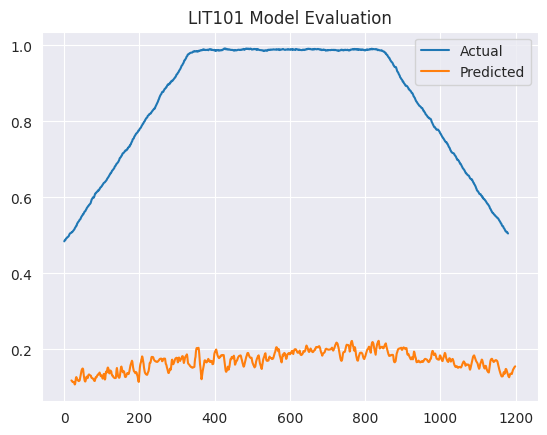

Mean Absolute Error: 0.6811908119058733


In [90]:
plt.plot(df_actual['LIT101'], label='Actual')
plt.plot(df_predictions['LIT101'], label='Predicted')

plt.title('LIT101 Model Evaluation')
plt.legend()
plt.show()
mae = np.mean(np.abs(df_predictions['LIT101'] - df_actual['LIT101']))
print(f"Mean Absolute Error: {mae}")

In [33]:
# Assuming `history` is the output from model.fit()

history_1_dict = best_history.history


# Plot training & validation loss
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)

if 'mae' in history_1_dict:
    plt.plot(history_1_dict['mae'], label='Train MAE')
if 'val_mae' in history_1_dict:
    plt.plot(history_1_dict['val_mae'], label='Val MAE')
    
if 'loss' in history_1_dict:
    plt.plot(history_1_dict['loss'], label='Train Loss')
if 'val_loss' in history_1_dict:
    plt.plot(history_1_dict['val_loss'], label='Val Loss')
        
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(ncol=2)

# Plot accuracy (if available)
plt.subplot(1, 2, 2)

plt.plot(df_actual['LIT101'], label='Actual')
plt.plot(df_predictions['LIT101'], label='Predicted')

mae = np.mean(np.abs(df_predictions['LIT101'] - df_actual['LIT101']))
plt.legend([f'LIT101 Actual', f'Predicted (MAE: {mae:.4f})'])


plt.xlabel('Seconds')
plt.ylabel('Scaled Value')

# Show the plots
#plt.tight_layout()

# Save the plot to a file (e.g., "plot.png")
plt.savefig('/home/loz/MSc/MSc_Project/Write_Up/Charts/LSTM_Eval.jpeg')
plt.show()

NameError: name 'best_history' is not defined

# Train Agent

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━

In [ ]:
print('test')